In [1]:
%matplotlib inline
from scvi.api.dataset import CortexDataset
gene_dataset = CortexDataset()

File data/expression.bin already downloaded
Preprocessing Cortex data


Finished preprocessing Cortex data
n_labels: 7
cell_types: ['astrocytes_ependymal' 'endothelial-mural' 'interneurons' 'microglia'
 'oligodendrocytes' 'pyramidal CA1' 'pyramidal SS']


In [2]:
from scvi.inference import UnsupervisedTrainer
from scvi.models.vae import VAE
vae = VAE(gene_dataset.nb_genes)
trainer = UnsupervisedTrainer(vae, gene_dataset)
trainer.train(1)

training:   0%|          | 0/1 [00:00<?, ?it/s]

training: 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

In [3]:
test_posterior = trainer.test_set

In [4]:
from scvi.api import posterior2adata
adata = posterior2adata(test_posterior)


bayes_factors_list.shape: (558,)
bayes_factors_list.shape: (558,)
bayes_factors_list.shape: (558,)


bayes_factors_list.shape: (558,)
bayes_factors_list.shape: (558,)
bayes_factors_list.shape: (558,)


bayes_factors_list.shape: (558,)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



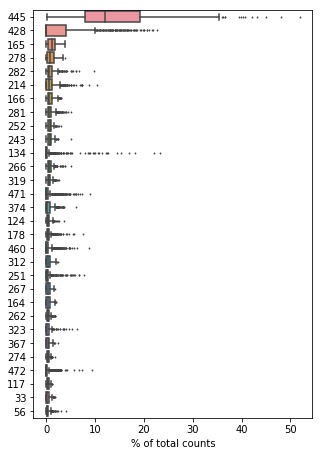

In [5]:
import scanpy.api as sc
sc.pl.highest_expr_genes(adata)


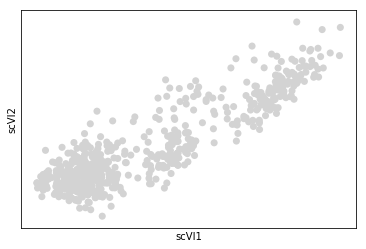

In [6]:
from scanpy.plotting.tools.scatterplots import plot_scatter

plot_scatter(adata, basis="scVI")

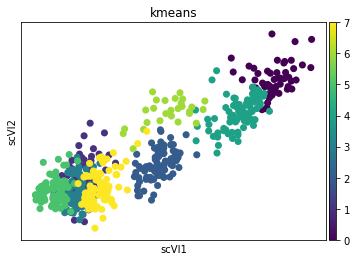

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit_transform(adata.obsm["X_scVI"])
kmeans.n_clusters
kmeans.labels_
adata.obs['kmeans'] = kmeans.labels_
plot_scatter(adata, basis="scVI", color='kmeans')

In [8]:
adata.var['n_genes']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
       ..
528   NaN
529   NaN
530   NaN
531   NaN
532   NaN
533   NaN
534   NaN
535   NaN
536   NaN
537   NaN
538   NaN
539   NaN
540   NaN
541   NaN
542   NaN
543   NaN
544   NaN
545   NaN
546   NaN
547   NaN
548   NaN
549   NaN
550   NaN
551   NaN
552   NaN
553   NaN
554   NaN
555   NaN
556   NaN
557   NaN
Name: n_genes, Length: 558, dtype: float32